In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
#Data Collection & Processing
exercise=pd.read_csv("..\Datasets\exercise.csv")
calories=pd.read_csv("..\Datasets\calories.csv")

In [3]:
print(exercise.shape)
exercise.head(10)

(15000, 8)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [4]:
print(calories.shape)
calories.head(10)

(15000, 2)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [5]:
calories_data = pd.concat([exercise, calories['Calories']], axis="columns")
calories_data=calories_data.drop(columns=["User_ID"])
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
#Data Analysis
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

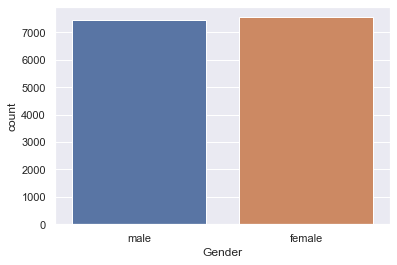

In [8]:
#Data Visualization
sns.set()
sns.countplot(calories_data['Gender'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

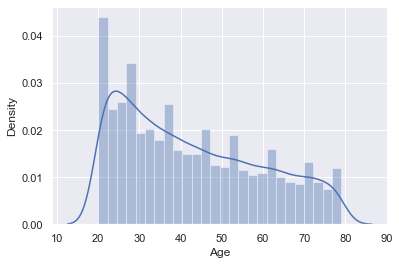

In [9]:
sns.distplot(calories_data['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

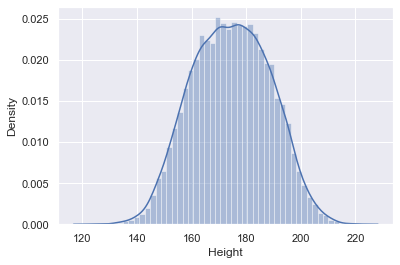

In [10]:
sns.distplot(calories_data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

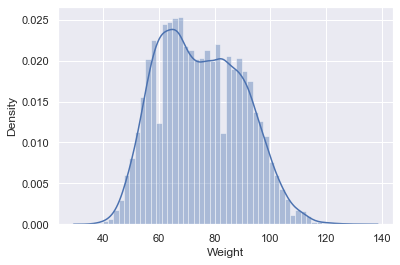

In [11]:
sns.distplot(calories_data['Weight'])

In [12]:
#spliting data
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']
print(X.head())
print(Y.head())

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       0   68   190.0    94.0      29.0       105.0       40.8
1       1   20   166.0    60.0      14.0        94.0       40.3
2       0   69   179.0    79.0       5.0        88.0       38.7
3       1   34   179.0    71.0      13.0       100.0       40.5
4       1   27   154.0    58.0      10.0        81.0       39.8
0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64


In [22]:
X.min()

Gender          0.0
Age            20.0
Height        123.0
Weight         36.0
Duration        1.0
Heart_Rate     67.0
Body_Temp      37.1
dtype: float64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [14]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(12000, 7) (3000, 7)
(12000,) (3000,)


In [15]:
#Model Training
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
model.score(X_test,Y_test)

0.9645972794556343

In [17]:
pickle.dump(model, open('caloriesburntmodel.pkl','wb'))

In [19]:
model = pickle.load(open('..\\Notebook\\caloriesburntmodel.pkl','rb'))
print(model.predict([[1,45,170,75,30,100,91]]))

[-670.78454518]
